In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/TSU/Lab_Machine_Learning/Lab1/day.csv'

In [4]:
df = pd.read_csv(filename)

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# 1.Получить описание набора данных и список атрибутов, получить число пропущенных значений в для каждого атрибута

## Описание набора данных


- instant: record index
- dteday: date
- season: season
  - 1: spring
  - 2: summer
  - 3: fall
  - 4: winter
- yr: year
  - 0: 2011
  - 1: 2012
- mnth: month (1 to 12)
- holiday: whether day is holiday or not (extracted from [District of Columbia
DEPARTMENT OF HUMAN RESOURCES](http://dchr.dc.gov/page/holiday-schedule))
- weekday: day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit:
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Список атрибутов

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Число пропущенных значений

In [8]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# 2.Обработки пропущенных значений

Так как у нашего датасета отсутсвуют пропущенные значения, нам не нужно обработать его.

## Надо проверить дубликаты

In [9]:
duplicates = df.duplicated()
for i in range(len(duplicates)):
  if duplicates[i]:
    print(i)

Дубликатов нет, то есть можно дальше идем

# 3.Построить pairplot для набора данных

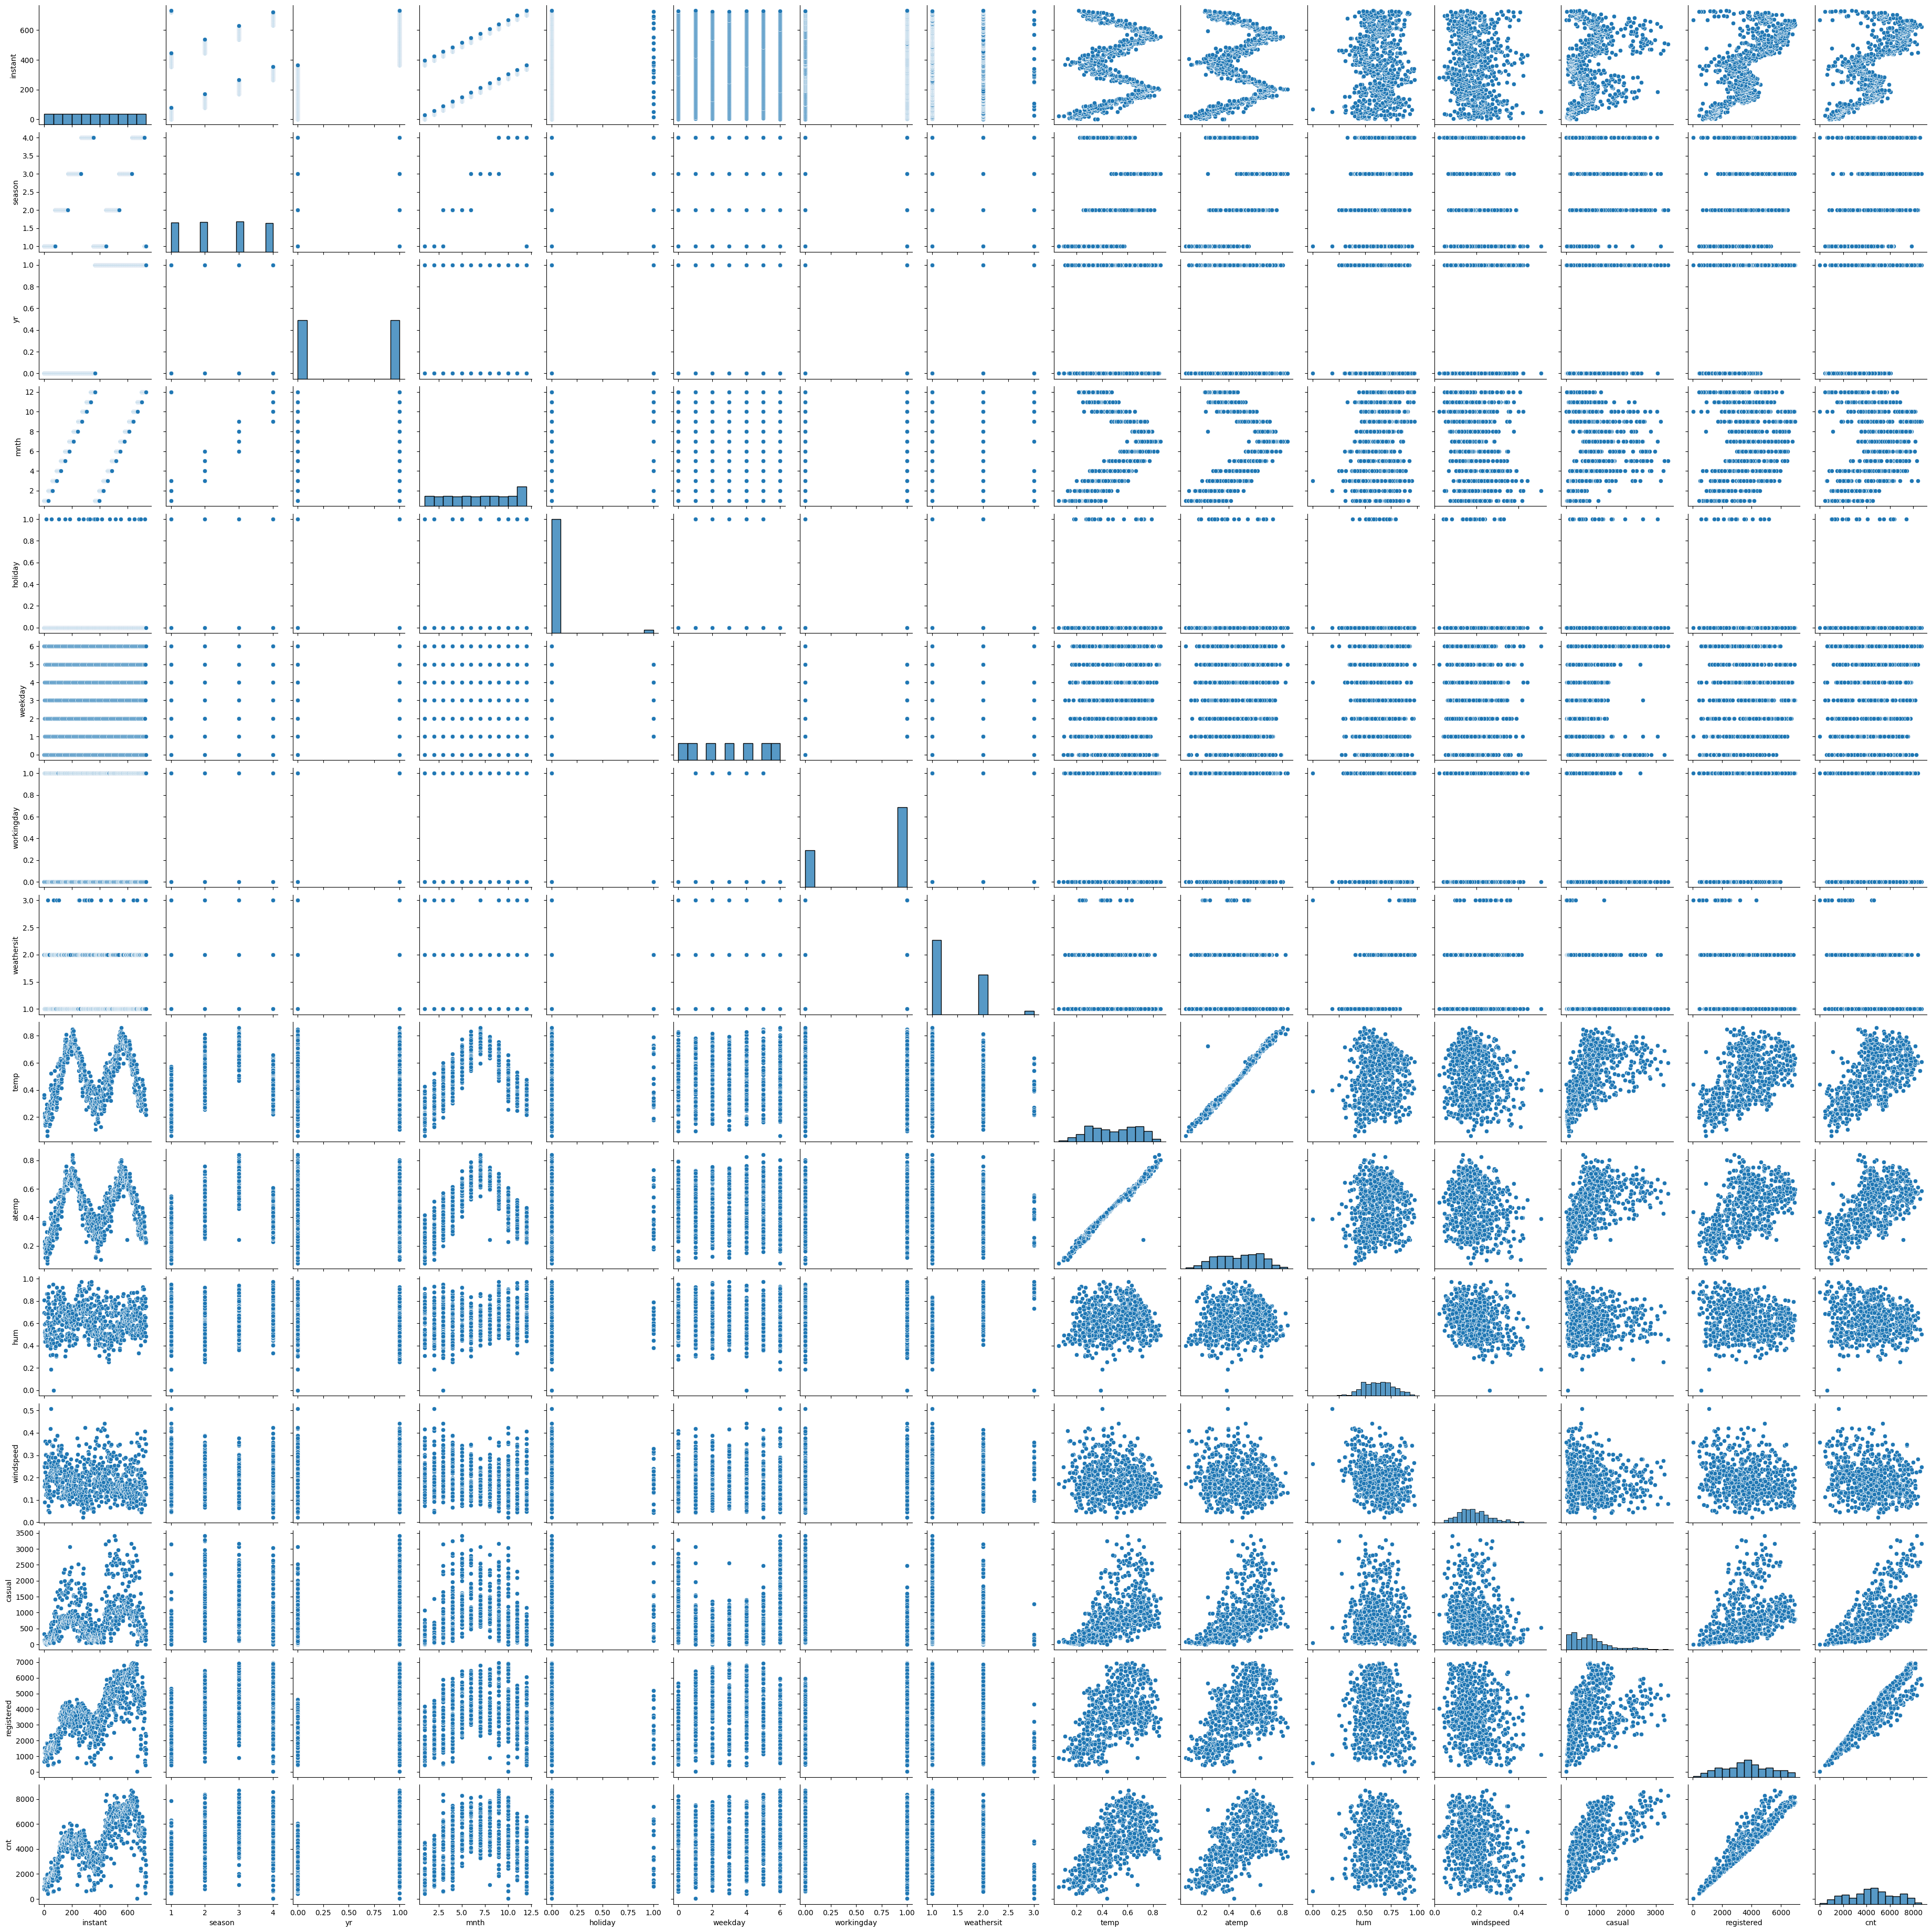

In [10]:
sns.pairplot(df)

# 4.Выбрать не менее 2-х признаков с неким распределением значений, и отобразить это распределение с помощью гистограмм hist и kdeplot, jointplot

## Признак: temp

<Axes: xlabel='temp', ylabel='Count'>

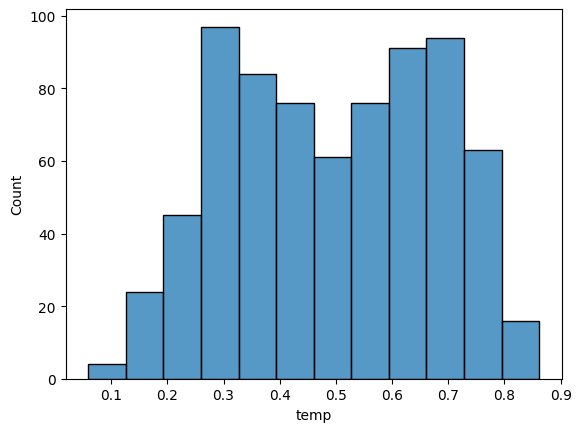

In [11]:
sns.histplot(df['temp'])

<Axes: xlabel='temp', ylabel='Density'>

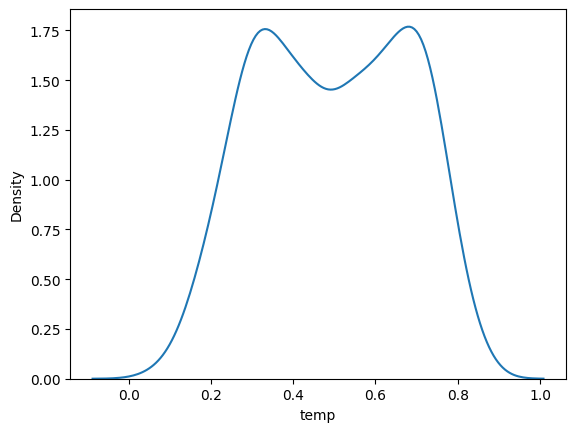

In [12]:
sns.kdeplot(df['temp'])

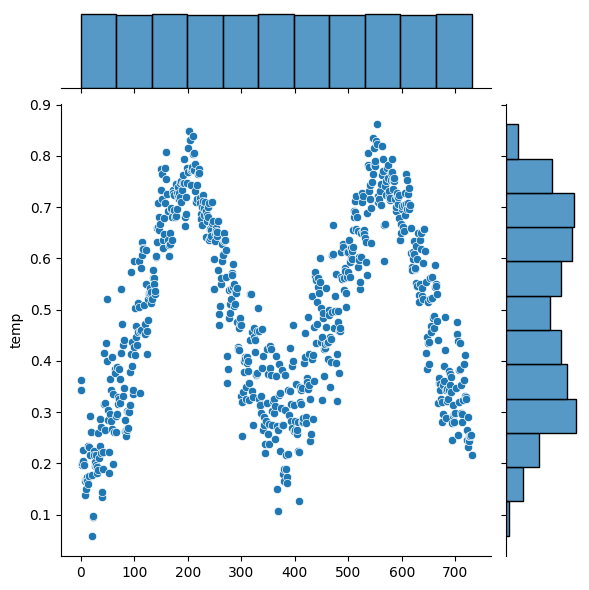

In [13]:
sns.jointplot(df['temp'])

## Признак: windspeed

<Axes: xlabel='windspeed', ylabel='Count'>

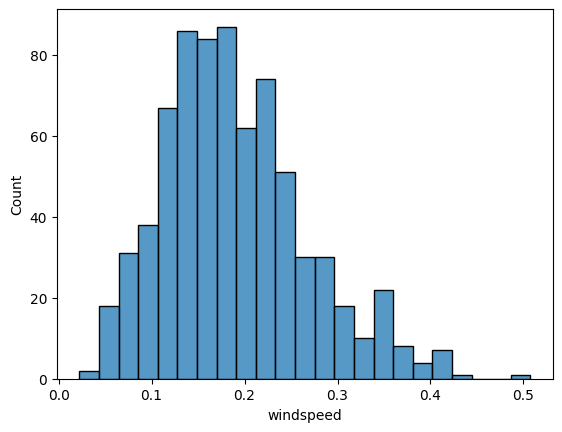

In [14]:
sns.histplot(df['windspeed'])

<Axes: xlabel='windspeed', ylabel='Density'>

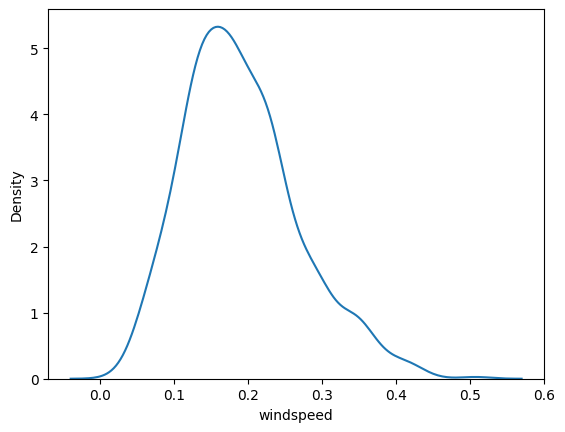

In [15]:
sns.kdeplot(df['windspeed'])

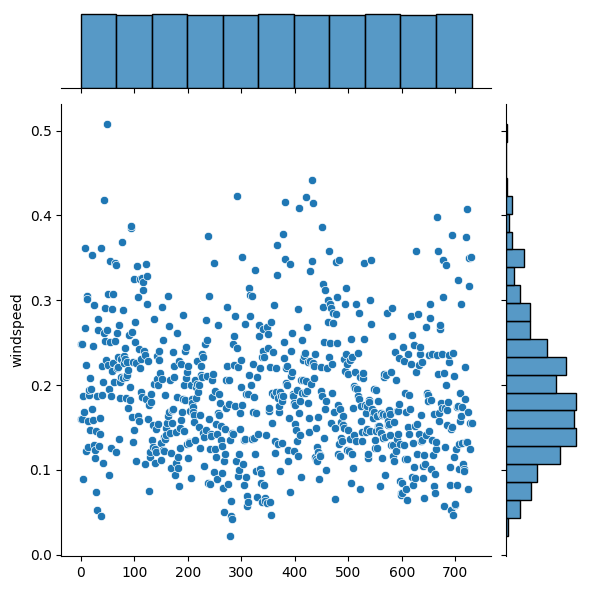

In [16]:
sns.jointplot(df['windspeed'])

## Признак: casual

<Axes: xlabel='casual', ylabel='Count'>

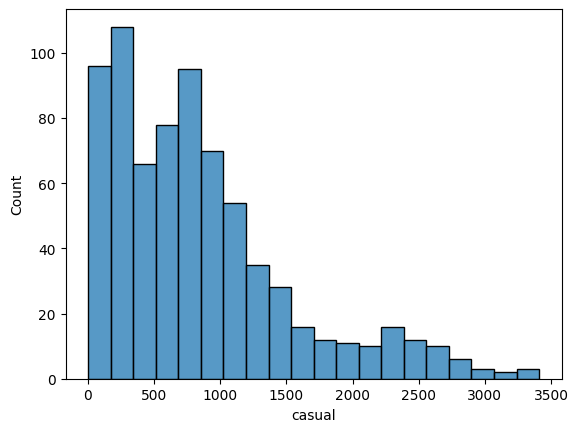

In [17]:
sns.histplot(df['casual'])

<Axes: xlabel='casual', ylabel='Density'>

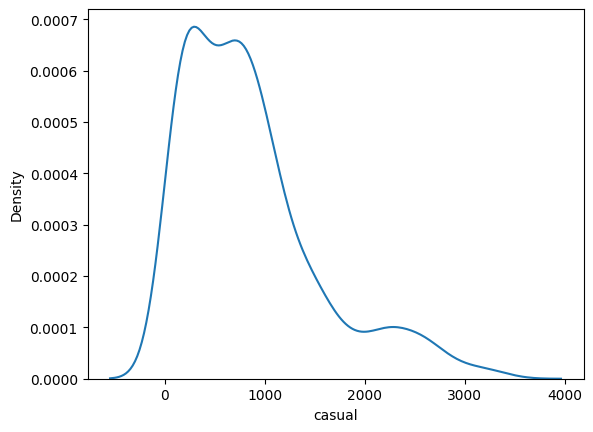

In [18]:
sns.kdeplot(df['casual'])

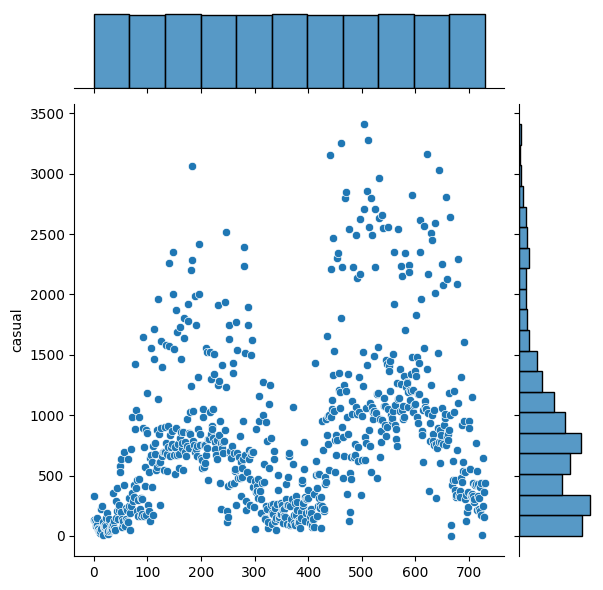

In [19]:
sns.jointplot(df['casual'])

## Признак: registered

<Axes: xlabel='registered', ylabel='Count'>

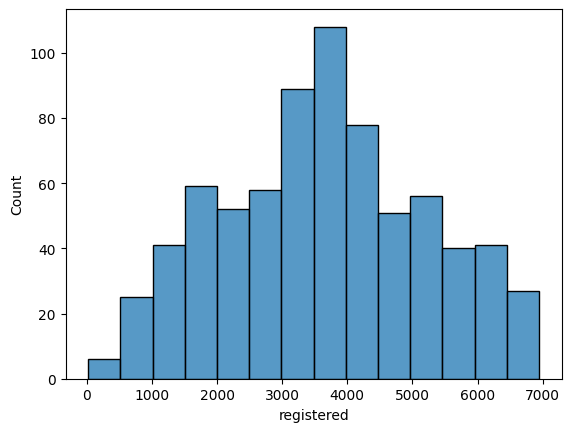

In [20]:
sns.histplot(df['registered'])

<Axes: xlabel='registered', ylabel='Density'>

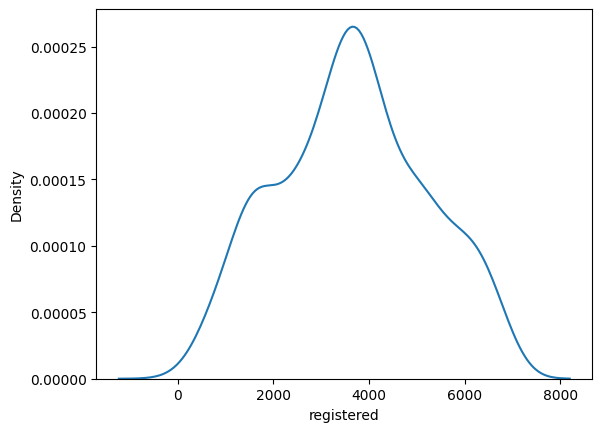

In [21]:
sns.kdeplot(df['registered'])

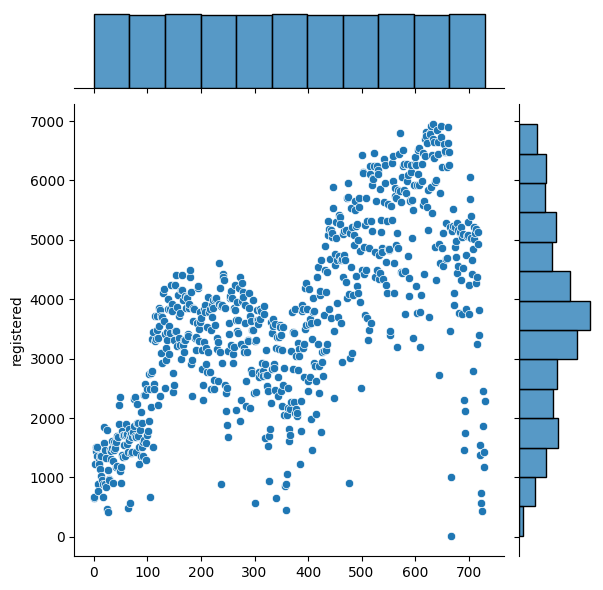

In [22]:
sns.jointplot(df['registered'])

# 5.Выбрать часть признаков датасета и отобразить корреляцию между ними в виде тепловой карты (heatmap).

In [42]:
correlation_df = df[['temp', 'season', 'weekday', 'holiday', 'weathersit', 'windspeed', 'cnt']].corr()

<Axes: >

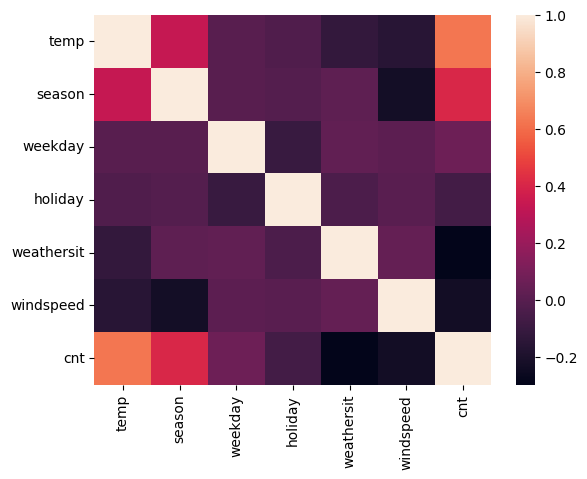

In [43]:
sns.heatmap(correlation_df)

<ipython-input-45-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

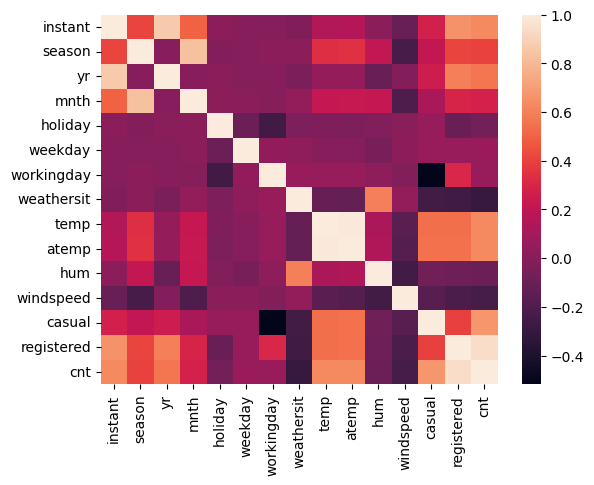

In [45]:
sns.heatmap(df.corr())

# 6.Выбрать 3 признака (имеющие некое распределение значений), целевую переменную (категориальную) и отобразить для них графики размаха (ящик с усами, box plot)

## Change value of season from integer to string based on it's category
 - 1: Spring
 - 2: Summer
 - 3: Autumn
 - 4: Winter

In [6]:
df_season = df.copy()
df_season

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
df_season['season'].replace([1], 'Spring', inplace=True)
df_season['season'].replace([2], 'Summer', inplace=True)
df_season['season'].replace([3], 'Fall', inplace=True)
df_season['season'].replace([4], 'Winter', inplace=True)
df_season

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Draw boxplot

In [14]:
df_season['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

<Axes: xlabel='cnt', ylabel='season'>

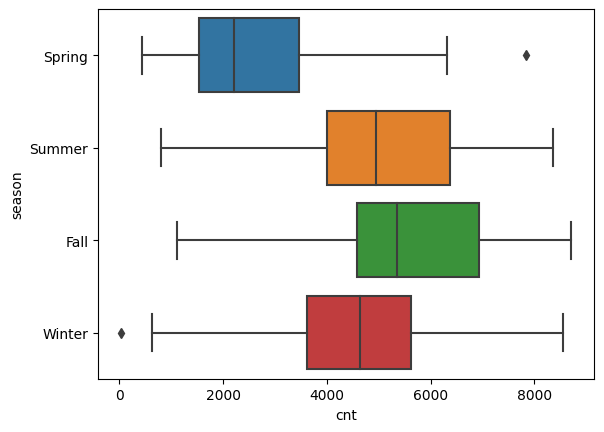

In [15]:
sns.boxplot(data=df_season, x='cnt', y='season')

<Axes: xlabel='casual', ylabel='season'>

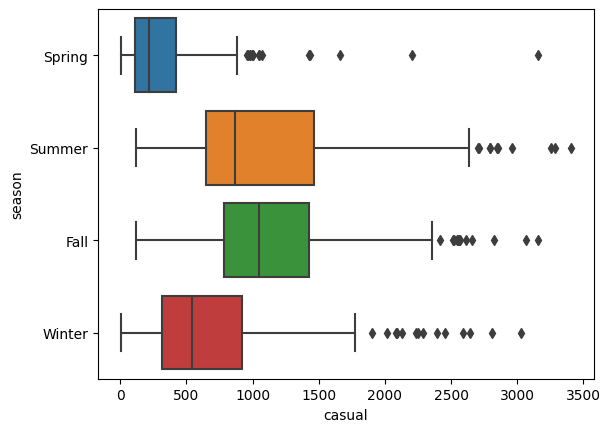

In [16]:
sns.boxplot(data=df_season, x='casual', y='season')

<Axes: xlabel='registered', ylabel='season'>

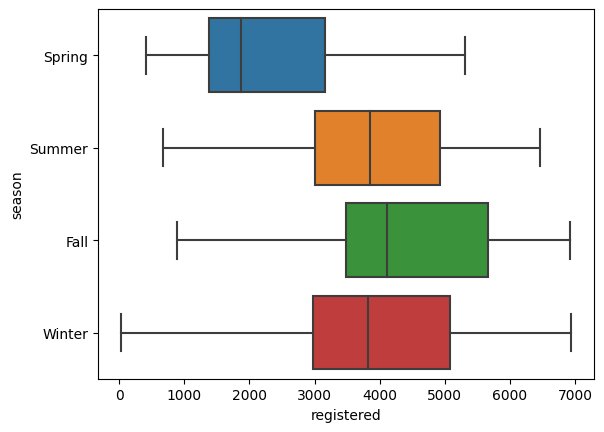

In [17]:
sns.boxplot(data=df_season, x='registered', y='season')

# 7.Визуализировать некоторые статистики, для разных атрибутов с использованием следующих инструментов: violinplot, stripplot, swarmplot, pie.

## Violinplot

<Axes: >

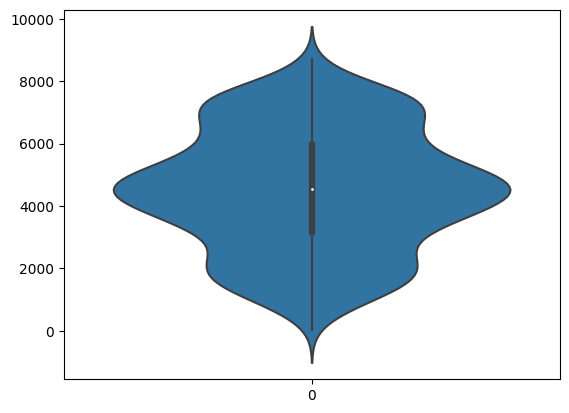

In [21]:
sns.violinplot(df['cnt'])

<Axes: >

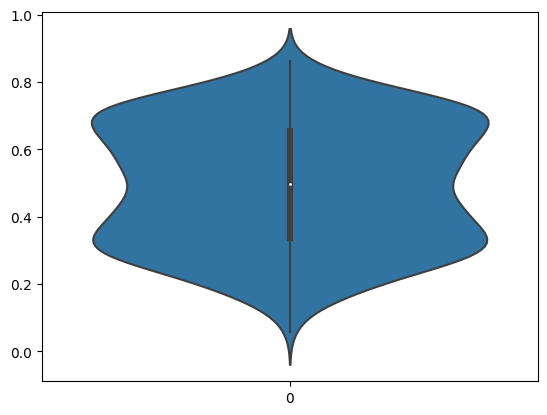

In [22]:
sns.violinplot(df['temp'])

<Axes: xlabel='cnt', ylabel='season'>

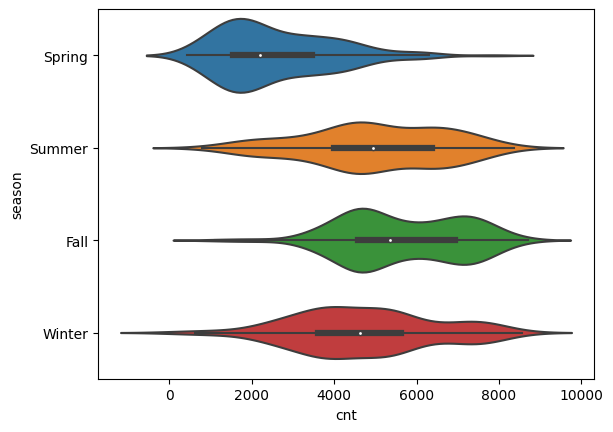

In [23]:
sns.violinplot(df_season, x='cnt', y='season')

## Stripplot

<Axes: xlabel='temp'>

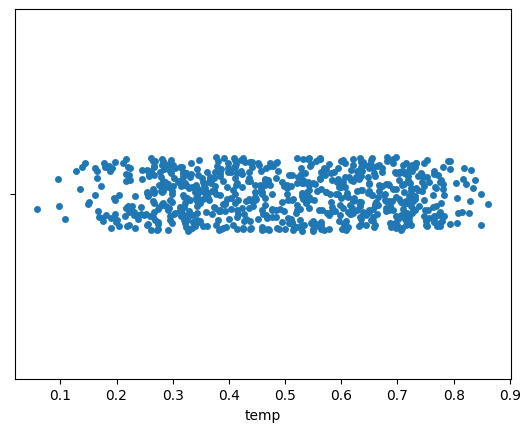

In [25]:
sns.stripplot(df, x='temp')

<Axes: xlabel='weekday'>

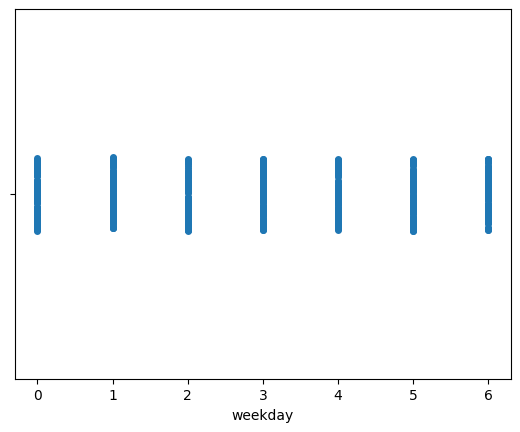

In [27]:
sns.stripplot(df, x='weekday')

<Axes: xlabel='temp', ylabel='season'>

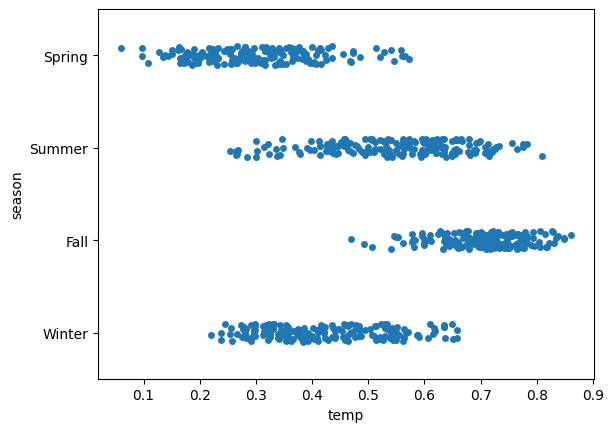

In [28]:
sns.stripplot(df_season, x='temp', y='season')

<Axes: xlabel='cnt', ylabel='season'>

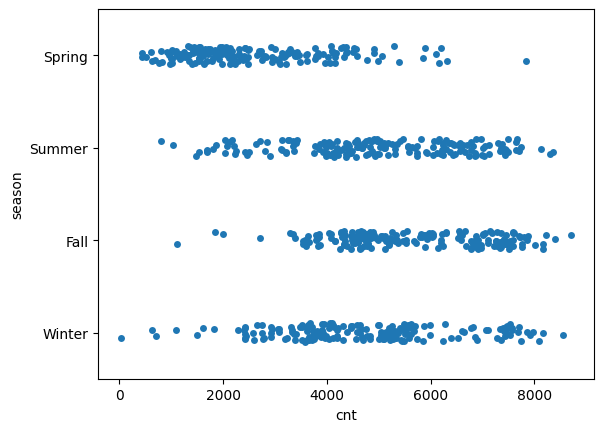

In [26]:
sns.stripplot(df_season, x='cnt', y='season')

## Swarmplot

<Axes: xlabel='cnt', ylabel='season'>

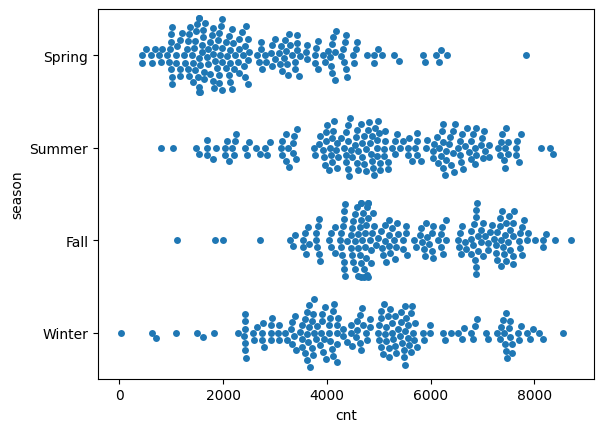

In [11]:
sns.swarmplot(df_season, x='cnt', y='season')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='temp', ylabel='season'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


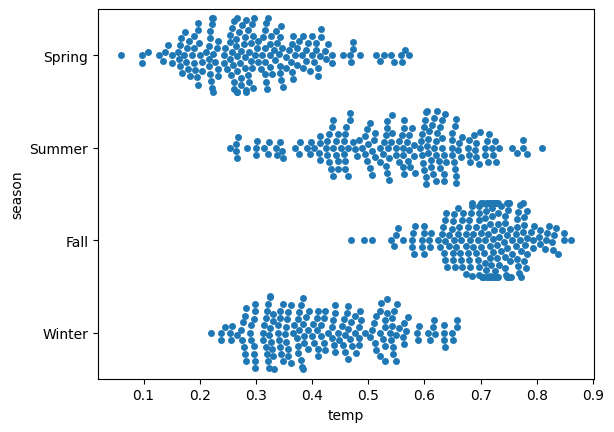

In [12]:
sns.swarmplot(df_season, x='temp', y='season')

## Pie

In [22]:
df_groupSeason = df_season[['season', 'casual', 'registered', 'cnt']]
df_groupSeason = df_groupSeason.groupby('season').sum()

In [23]:
df_groupSeason

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [28]:
labels = df_groupSeason.index.tolist()
labels

['Fall', 'Spring', 'Summer', 'Winter']

([<matplotlib.patches.Wedge at 0x792d8e1ac340>,
 [Text(0.5827735054261532, 0.9329389269257198, 'Fall'),
  Text(-0.8642521885693449, 0.6804911127656977, 'Spring'),
  Text(-0.8695554041709471, -0.6737012684247381, 'Summer'),
  Text(0.7640105179336124, -0.7913835533335358, 'Winter')])

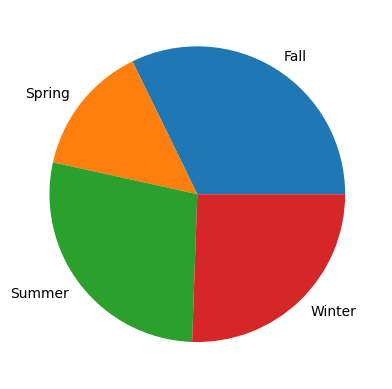

In [29]:
plt.pie(df_groupSeason['cnt'], labels=labels)

([<matplotlib.patches.Wedge at 0x792d8e1d7430>,
 [Text(0.6113087853593836, 0.914495253646751, 'Fall'),
  Text(-0.8443626103655231, 0.7050189942240707, 'Spring'),
  Text(-0.8903739675350559, -0.6459366826058753, 'Summer'),
  Text(0.7368878902502695, -0.8166983759029444, 'Winter')])

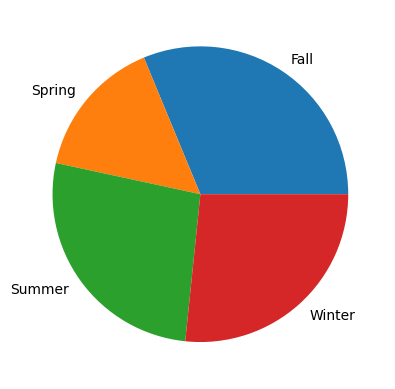

In [30]:
plt.pie(df_groupSeason['registered'], labels=labels)

([<matplotlib.patches.Wedge at 0x792d8e031780>,
 [Text(0.45375873965448116, 1.0020494030671228, 'Fall'),
  Text(-0.9416407960743982, 0.5686058486934281, 'Spring'),
  Text(-0.7701869178220583, -0.7853738674133219, 'Summer'),
  Text(0.8706086305494775, -0.6723396555408312, 'Winter')])

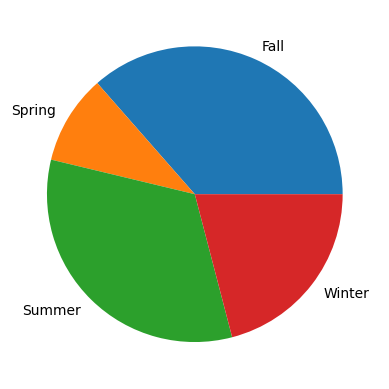

In [31]:
plt.pie(df_groupSeason['casual'], labels=labels)

# Заключение

Видно из heatmap что признак: cnt (количество арендуемых велосипедов) и temp и season. То есть сезон и температура влияет на значение cnt.

Интересно что температура в осенью выше температуре в лето, следовательно самое большое значение cnt в осенью.

Но в зимой количество велосипедов, взятых в аренду зарегистрированными клиентами, довольно велико, занимает третье место.